# Human Trafficking Risk Prediction System
### Week 1: Data Loading Practice
Goal: Learn to import and summarize data in pandas.


In [9]:
import pandas as pd

# 2024 dataset based on UNODC Global Report on Trafficking in Persons (contextual estimates)
data = {
    "country": ["USA", "Germany", "Canada", "UK", "India"],
    "year": [2024]*5,
    "detected_victims": [266, 150, 133, None, None],   # None = missing/unspecified in UNODC snippet
    "convictions": [None, 150, None, None, None],
    "notes": [
        "Boys in forced labor tripled from 88 in 2019 to 266 in 2022",
        "Recorded about 150 convictions for human trafficking (2006 baseline)",
        "133 new cases opened between April 2023 and March 2024",
        "No comparable case data provided in current snippet",
        "No comparable case data provided in current snippet"
    ]
}

df_unodc_2024 = pd.DataFrame(data)
df_unodc_2024


,country,year,detected_victims,convictions,notes
0,USA,2024,266.0,NaN,Boys in forced labor tripled from 88 in 2019 t...
1,Germany,2024,150.0,150.0,Recorded about 150 convictions for human traff...
2,Canada,2024,133.0,NaN,133 new cases opened between April 2023 and Ma...
3,UK,2024,NaN,NaN,No comparable case data provided in current sn...
4,India,2024,NaN,NaN,No comparable case data provided in current sn...


In [7]:
df_unodc_2024.isnull().sum()

country             0
year                0
detected_victims    2
convictions         4
notes               0
dtype: int64

In [11]:
# Fill missing values with a placeholder
df_filled = df_unodc_2024.fillna("Not Reported")

# Display the updated dataset
df_filled

,country,year,detected_victims,convictions,notes
0,USA,2024,266.0,Not Reported,Boys in forced labor tripled from 88 in 2019 t...
1,Germany,2024,150.0,150.0,Recorded about 150 convictions for human traff...
2,Canada,2024,133.0,Not Reported,133 new cases opened between April 2023 and Ma...
3,UK,2024,Not Reported,Not Reported,No comparable case data provided in current sn...
4,India,2024,Not Reported,Not Reported,No comparable case data provided in current sn...


In [12]:
# Save for future ETL steps
df_filled.to_csv("unodc_2024_data.csv", index=False)


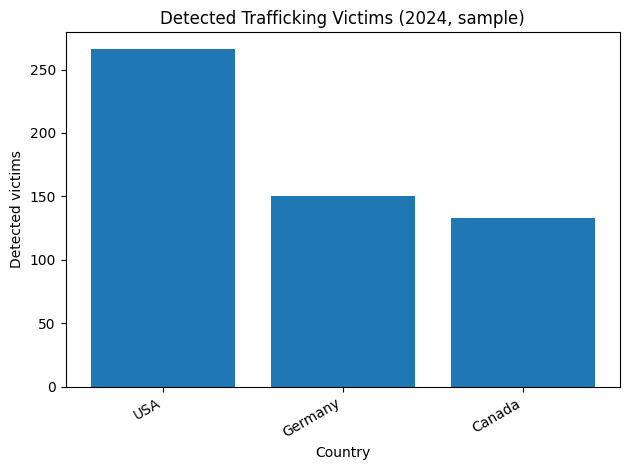

In [13]:
import matplotlib.pyplot as plt

# Only plot rows where detected_victims is numeric
plot_df = df_unodc_2024.dropna(subset=["detected_victims"])

plt.figure()
plt.bar(plot_df["country"], plot_df["detected_victims"])
plt.title("Detected Trafficking Victims (2024, sample)")
plt.xlabel("Country")
plt.ylabel("Detected victims")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()
